# Scattering of a Silicon nanoparticle

Nuno de Sousa  
Mole Group  
April 2020

In [1]:
%matplotlib notebook  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sys

np.seterr(divide='ignore', invalid='ignore')

from mole_mie.MieScatt import MieScatt
from mole_mie.Materials import Materials
from mole_mie.MieScatt import MappingSpace

In [2]:
from mole_mie.MieScatt import MieScatt
MieScatt.__version__

'0.1.4.6'

In [3]:
wavelength_start = 1000  # wavelength range lower limit
wavelength_end = 2000  # wavelength range upper limit
wavelength_steps = 500
wavelength_list = np.arange(wavelength_start, wavelength_end,
                            (wavelength_end - wavelength_start) / wavelength_steps)

radius = 230
medium_ref_index = 1
N_multipoles = 10

In [4]:
# different ways of call materials. In this example we are going to use the first one, Si_palo
Si = Materials('Si_palo')
Si1 = Materials('Si1', source='constant', value = 3.5+0j)
Si2 = Materials('Si2', source='refractiveindex.info', path = 'https://refractiveindex.info/tmp/data/main/Si/Green-2008.csv')

You have loaded the magic 'Si de palo', i.e. wood silicon.
https://refractiveindex.info/tmp/data/main/Si/Green-2008.csv
Data Loaded.


In [5]:
mie = MieScatt()
mie.set_params(radius=radius, medium_ref_index=medium_ref_index, N_multipoles=N_multipoles)
mie.scan_cross_sections(wavelength_list, Si1)

__________________________________________________________________________________________________
Mie Scattering program Initiated.

You are using MoLE_Mie. Please cite the following:
* N. de Sousa, J.J. Saénz, "The title of the paper".

If you use the pre-loaded database, please cite:
* M.N.Polyanskiy, "Refractive index database," https: // refractiveindex.info. Accessed on 2019-10-04.
Version 0.1.4.6 dark ingrown toenail
__________________________________________________________________________________________________
Loaded Parameters for Si
radius =  230 (m)
refractive index of the medium =  1
Number of multipoles =  10


In [6]:
maps = MappingSpace()
maps.mesh_gen(xmin=-500, xmax=500, xstep=10, ymin=-500, ymax=500, ystep=10, plane='xz')
maps.convert_cartesian_to_spherical()

In [7]:
# An example of the coordinates:
maps.points

array([[707.10678119,   2.35619449,   3.14159265],
       [700.07142493,   2.36629516,   3.14159265],
       [693.10893805,   2.37659982,   3.14159265],
       ...,
       [693.10893805,   0.76499283,   0.        ],
       [700.07142493,   0.7752975 ,   0.        ],
       [707.10678119,   0.78539816,   0.        ]])

In [8]:
""" - wavelength
 - Material
 - Number of Multipoles
 - points to compute the field is spherical coordinates
 - components (Electric, Magnetic or Electric and Magnetic)
 - rat (Scattered or Full field)

 'components' parameter defines the element of the electromagnetic field to be computed.
 It accept the values 'E' - electric field, 'H' - Magnetic Field and 'EH' -  Electric and Magnetic Field
 "rat" parameter accepts 'Scatt' or 'Full'. It computes the scattered or the full field, considering the plane wave
 Results are stored inside the object in variables: E_scatt_int, H_scatt_int, E_total, H_total
 """

mie.compute_fields(1126.33, Si1, 1, maps.points, components = 'EH', rat = 'Scatt')
mie.abs_fields()

<IPython.core.display.Javascript object>


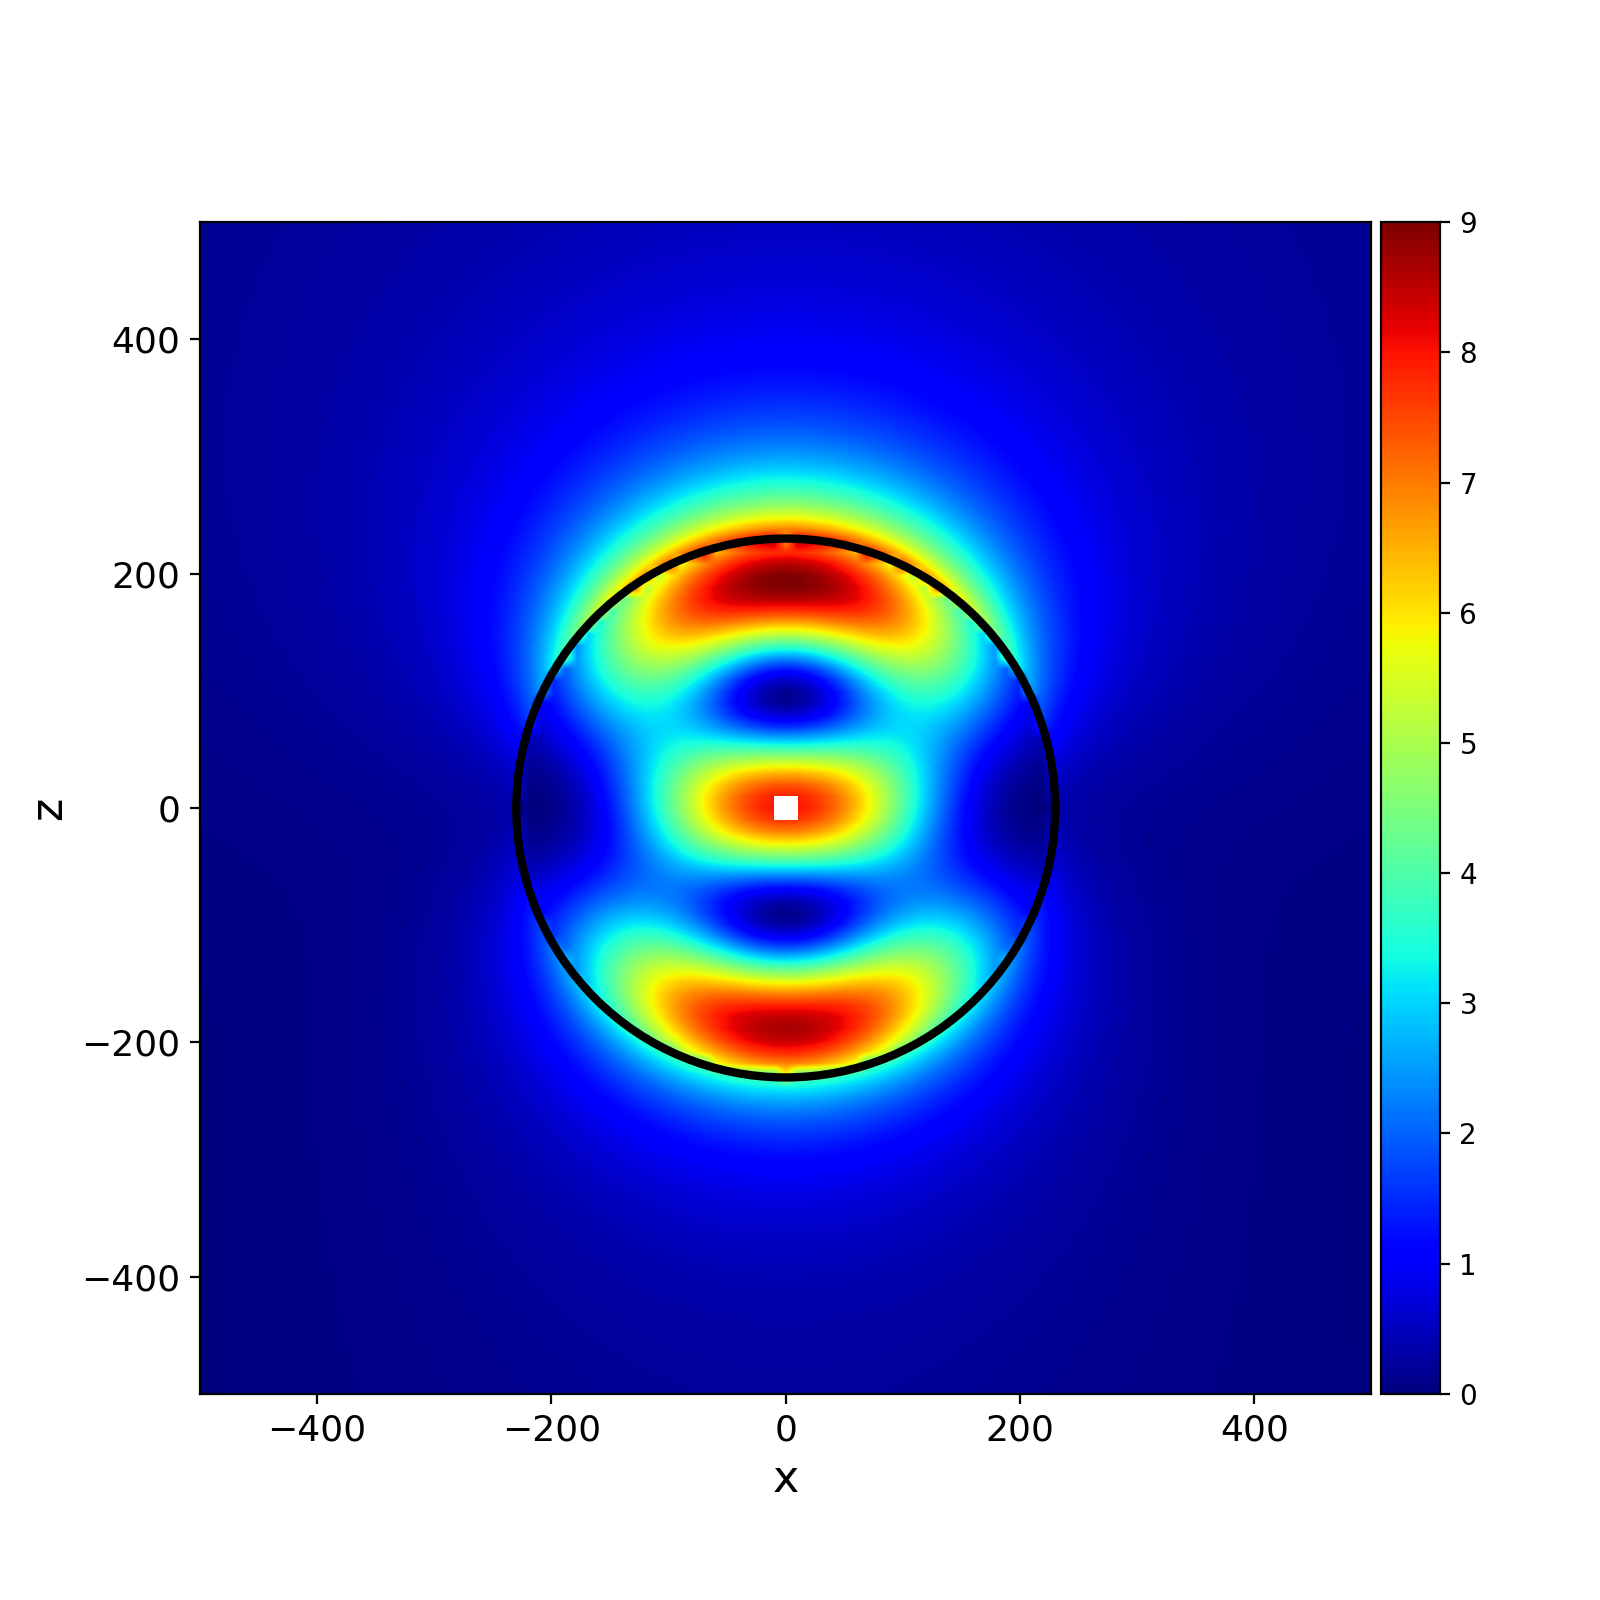

<IPython.core.display.Javascript object>


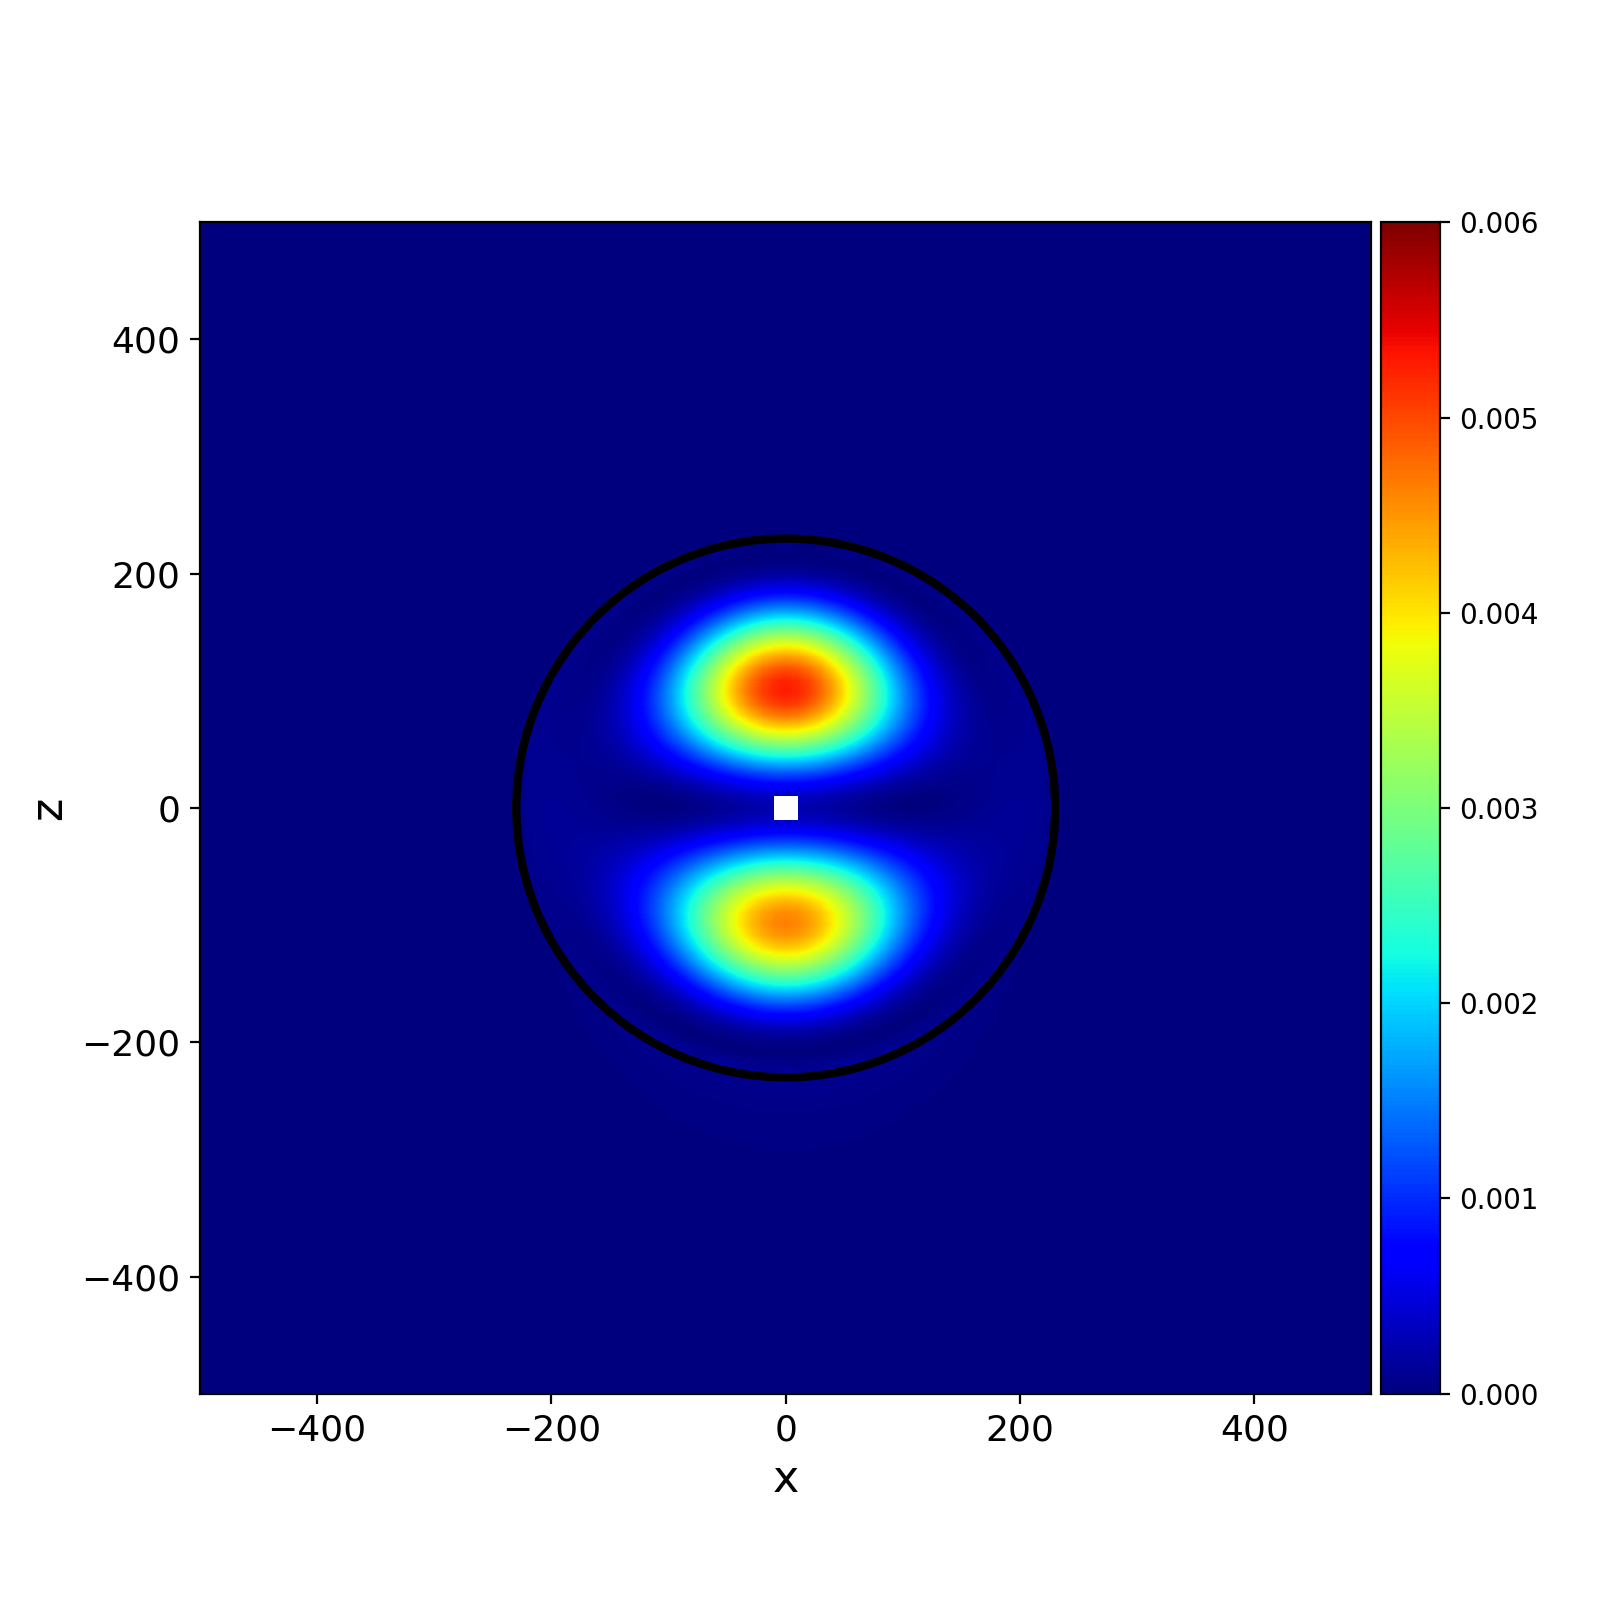

In [9]:
fig, ax = plt.subplots(figsize = (8,8))

#z = np.real(Escatt.reshape(101,101).T)
z = np.real(mie.E_scatt_int_abs.reshape(101,101))
im = ax.imshow(z, cmap=cm.jet, interpolation='bilinear', extent = [-500,500,-500,500], vmin = 0, vmax =9, origin = 'lower')
#ax.contour(z, levels = 10, colors='blue', linewidths = 0.5, origin='lower', extent=[-1000,1000,-1000,1000])
ax.set_xlabel('x', fontsize = 16)
ax.set_ylabel('z', fontsize = 16)
plt.tick_params('both', labelsize = 13)
#fig.colorbar(im, ax = ax)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

circle = plt.Circle((0, 0), 230, color='black', clip_on=False, fill = False, linewidth = 3)
#circle = plt.Circle((0, 0), 230, color='black', clip_on=False, fill = True)
ax.add_artist(circle)

fig, ax = plt.subplots(figsize = (8,8))

#z = np.real(Escatt.reshape(101,101).T)
z = np.real(mie.H_scatt_int_abs.reshape(101,101))
im = ax.imshow(z, cmap=cm.jet, interpolation='bilinear', extent = [-500,500,-500,500], vmin = 0, vmax =6E-3, origin = 'lower')
#ax.contour(z, levels = 10, colors='blue', linewidths = 0.5, origin='lower', extent=[-1000,1000,-1000,1000])
ax.set_xlabel('x', fontsize = 16)
ax.set_ylabel('z', fontsize = 16)
plt.tick_params('both', labelsize = 13)
#fig.colorbar(im, ax = ax)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

circle = plt.Circle((0, 0), 230, color='black', clip_on=False, fill = False, linewidth = 3)
#circle = plt.Circle((0, 0), 230, color='black', clip_on=False, fill = True)
ax.add_artist(circle)

In [ ]:
fig, ax = plt.subplots(figsize = (9, 5.5))

ax.plot(mie.cross_sections.index,mie.cross_sections['Qabs'], label='$Q_{abs}$')
ax.plot(1280, 4.638582, marker = 'x', color = 'black')
ax.plot(1680, 8.105445, marker = 'x', color = 'black')
ax.plot(1162, 6.464978, marker = 'x', color = 'black')
ax.plot(mie.cross_sections.index,mie.cross_sections['Qext'], label='$Q_{ext}$')
ax.plot(mie.cross_sections.index,mie.cross_sections['Qscat'], label='$Q_{scat}$', linestyle=':')
ax.plot(mie.expanded_Qext.index,mie.expanded_Qext['Qext_a1'], label='$Q_{ext, a1}$')
ax.plot(mie.expanded_Qext.index,mie.expanded_Qext['Qext_b1'], label='$Q_{ext, b1}$')
ax.plot(mie.expanded_Qext.index,mie.expanded_Qext['Qext_b2'], label='$Q_{ext, b2}$')
ax.set_xlabel('$\lambda$ (nm)', fontsize=16)
ax.set_ylabel('Q', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.legend(fontsize=13)
#plt.title('Cross Sections', fontsize=14)
plt.xlim(1000, 2000)
plt.text(1255,3.7, '1280', fontsize = 12)
plt.text(1650,6, '1680', fontsize = 12)
plt.text(1070,6.3, '1162', fontsize = 12)
plt.savefig('Cross_Sections.png', dpi = 300, transparent = True)

In [ ]:
fig, ax = plt.subplots(nrows = 4, figsize = (9, 11), sharex = True)

ax[0].plot(mie.coeffs.index, np.real(mie.coeffs['a1'].to_numpy()), label = 'a1.re')
ax[0].plot(mie.coeffs.index, np.real(mie.coeffs['a2'].to_numpy()), label = 'a2.re')
ax[0].plot(mie.coeffs.index, np.real(mie.coeffs['b1'].to_numpy()), label = 'b1.re')
ax[0].plot(mie.coeffs.index, np.real(mie.coeffs['b2'].to_numpy()), label = 'b2.re')
ax[1].plot(mie.coeffs.index, np.real(mie.coeffs['c1'].to_numpy()), label = 'c1.re')
ax[1].plot(mie.coeffs.index, np.real(mie.coeffs['c2'].to_numpy()), label = 'c2.re')
ax[1].plot(mie.coeffs.index, np.real(mie.coeffs['d1'].to_numpy()), label = 'd1.re')
ax[1].plot(mie.coeffs.index, np.real(mie.coeffs['d2'].to_numpy()), label = 'd2.re')
ax[2].plot(mie.coeffs.index, np.imag(mie.coeffs['a1'].to_numpy()), label = 'a1.im')
ax[2].plot(mie.coeffs.index, np.imag(mie.coeffs['a2'].to_numpy()), label = 'a2.im')
ax[2].plot(mie.coeffs.index, np.imag(mie.coeffs['b1'].to_numpy()), label = 'b1.im')
ax[2].plot(mie.coeffs.index, np.imag(mie.coeffs['b2'].to_numpy()), label = 'b2.im')
ax[3].plot(mie.coeffs.index, np.imag(mie.coeffs['c1'].to_numpy()), label = 'c1.im')
ax[3].plot(mie.coeffs.index, np.imag(mie.coeffs['c2'].to_numpy()), label = 'c2.im')
ax[3].plot(mie.coeffs.index, np.imag(mie.coeffs['d1'].to_numpy()), label = 'd1.im')
ax[3].plot(mie.coeffs.index, np.imag(mie.coeffs['d2'].to_numpy()), label = 'd2.im')
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

ax[3].set_xlabel('$\lambda$ (nm)', fontsize=16)
ax[0].set_ylabel('', fontsize=16)
ax[1].set_ylabel('', fontsize=16)
ax[2].set_ylabel('', fontsize=16)
ax[3].set_ylabel('', fontsize=16)

ax[0].tick_params(axis='both', which='major', labelsize=13)
ax[1].tick_params(axis='both', which='major', labelsize=13)
ax[2].tick_params(axis='both', which='major', labelsize=13)
ax[3].tick_params(axis='both', which='major', labelsize=13)
plt.subplots_adjust(hspace=0.)